In [3739]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [3740]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 3/kc_house_data.csv')

In [3741]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3742]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [3743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3744]:
df['date'] = pd.to_datetime(df['date'])

In [3745]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3746]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [3747]:
df.insert(2, 'sale_month', df['date'].dt.month)
df.insert(3, 'sale_year', df['date'].dt.year)
df.insert(4, 'sale_day', df['date'].dt.day)


In [3748]:
df.head()

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,10,2014,13,221900.0,3,1.00,1180,5650,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,12,2014,9,538000.0,3,2.25,2570,7242,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2,2015,25,180000.0,2,1.00,770,10000,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,12,2014,9,604000.0,4,3.00,1960,5000,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,2,2015,18,510000.0,3,2.00,1680,8080,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3749]:
df.describe(include='all')

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,6.574423,2014.322954,15.688197,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,1.000000,2014.000000,1.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,4.000000,2014.000000,8.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,6.000000,2014.000000,16.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,9.000000,2015.000000,23.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,12.000000,2015.000000,31.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.115308,0.467616,8.635063,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


I noticed that there are some strange values for bedrooms (33, 0) as well as bathrooms (0 values). A house with no bedrooms or bathrooms are unusual and it may be better to remove these from the dataset to improve our ability to predict.

In [3750]:
print(df[df['bedrooms'] > 15])

               id       date  sale_month  sale_year  sale_day     price   
15870  2402100895 2014-06-25           6       2014        25  640000.0  \

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
15870        33       1.75         1620      6000  ...      7        1040  \

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long   
15870            580      1947             0    98103  47.6878 -122.331  \

       sqft_living15  sqft_lot15  
15870           1330        4700  

[1 rows x 24 columns]


In [3751]:
print(df[df['bathrooms'] ==0])

               id       date  sale_month  sale_year  sale_day      price   
875    6306400140 2014-06-12           6       2014        12  1095000.0  \
1149   3421079032 2015-02-17           2       2015        17    75000.0   
3119   3918400017 2015-02-05           2       2015         5   380000.0   
5832   5702500050 2014-11-04          11       2014         4   280000.0   
6994   2954400190 2014-06-24           6       2014        24  1295650.0   
9773   3374500520 2015-04-29           4       2015        29   355000.0   
9854   7849202190 2014-12-23          12       2014        23   235000.0   
10481   203100435 2014-09-18           9       2014        18   484000.0   
14423  9543000205 2015-04-13           4       2015        13   139950.0   
19452  3980300371 2014-09-26           9       2014        26   142000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
875           0        0.0         3064      4764  ...      7        3064  \
1149     

In [3752]:
df = df[df['bedrooms'] != 33]

In [3753]:
df = df[df['bedrooms'] != 0]

In [3754]:
df = df[df['bathrooms'] != 0]

In [3755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21596 non-null  int64         
 1   date           21596 non-null  datetime64[ns]
 2   sale_month     21596 non-null  int32         
 3   sale_year      21596 non-null  int32         
 4   sale_day       21596 non-null  int32         
 5   price          21596 non-null  float64       
 6   bedrooms       21596 non-null  int64         
 7   bathrooms      21596 non-null  float64       
 8   sqft_living    21596 non-null  int64         
 9   sqft_lot       21596 non-null  int64         
 10  floors         21596 non-null  float64       
 11  waterfront     21596 non-null  int64         
 12  view           21596 non-null  int64         
 13  condition      21596 non-null  int64         
 14  grade          21596 non-null  int64         
 15  sqft_above     21596 non

I'm going to review the pricing distribution and values to see if any cleaning or transformation is needed. 

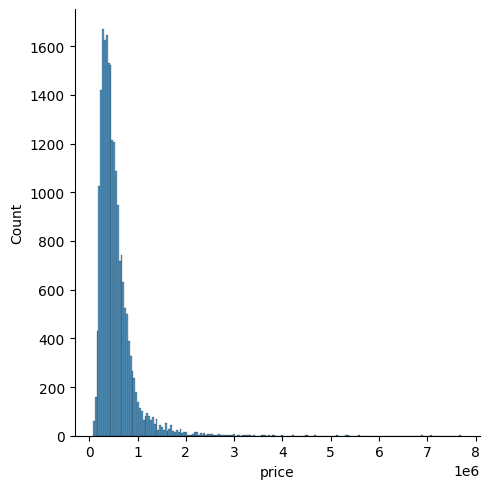

In [3756]:
sns.displot(df, x="price", bins=200)

<Axes: ylabel='price'>

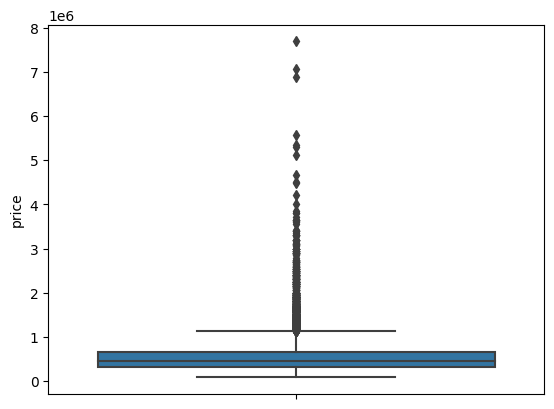

In [3757]:
sns.boxplot(data = df, y = 'price')

We can see there's a lot of outliers making the data extremely skewed. I will look to remove the outliers that are 3 z-scores away from the mean.

In [3758]:
z_scores = np.abs((df['price'] - df['price'].mean()) / df['price'].std())
outliers_mask = z_scores > 3
outliers = df[outliers_mask]
print(outliers)



               id       date  sale_month  sale_year  sale_day      price   
21     2524049179 2014-08-26           8       2014        26  2000000.0  \
153    7855801670 2015-04-01           4       2015         1  2250000.0   
246    2025069065 2014-09-29           9       2014        29  2400000.0   
269    7960900060 2015-05-04           5       2015         4  2900000.0   
282    7424700045 2015-05-13           5       2015        13  2050000.0   
...           ...        ...         ...        ...       ...        ...   
21514  3262300818 2015-02-27           2       2015        27  1865000.0   
21530  8964800330 2015-04-07           4       2015         7  3000000.0   
21540   715010530 2015-01-13           1       2015        13  1881580.0   
21568   524059330 2015-01-30           1       2015        30  1700000.0   
21576  9253900271 2015-01-07           1       2015         7  3567000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
21        

In [3759]:
df = df[~outliers_mask]

In [3760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21190 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21190 non-null  int64         
 1   date           21190 non-null  datetime64[ns]
 2   sale_month     21190 non-null  int32         
 3   sale_year      21190 non-null  int32         
 4   sale_day       21190 non-null  int32         
 5   price          21190 non-null  float64       
 6   bedrooms       21190 non-null  int64         
 7   bathrooms      21190 non-null  float64       
 8   sqft_living    21190 non-null  int64         
 9   sqft_lot       21190 non-null  int64         
 10  floors         21190 non-null  float64       
 11  waterfront     21190 non-null  int64         
 12  view           21190 non-null  int64         
 13  condition      21190 non-null  int64         
 14  grade          21190 non-null  int64         
 15  sqft_above     21190 non

<Axes: ylabel='price'>

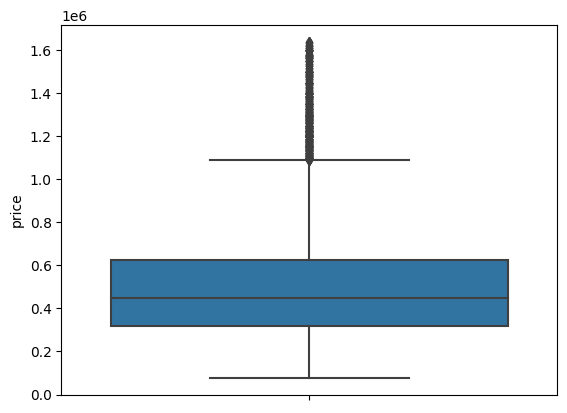

In [3761]:
sns.boxplot(data = df, y = 'price')

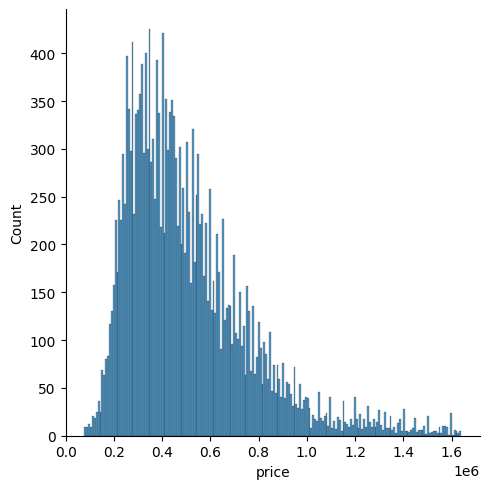

In [3762]:
sns.displot(df, x="price", bins=200)

Removing these outliers greatly improved the data.

In [3763]:
df.describe(include='all')

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.119000e+04,21190,21190.000000,21190.000000,21190.000000,2.119000e+04,21190.000000,21190.000000,21190.000000,2.119000e+04,...,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000
mean,4.592430e+09,2014-10-29 03:46:05.493157120,6.577678,2014.322558,15.697310,5.069308e+05,3.354696,2.087529,2032.505569,1.482715e+04,...,7.605333,1751.532515,280.973053,1970.927655,80.147475,98078.288485,47.558983,-122.213727,1960.418405,12632.094903
min,1.000102e+06,2014-05-02 00:00:00,1.000000,2014.000000,1.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125400e+09,2014-07-22 00:00:00,4.000000,2014.000000,8.000000,3.200000e+05,3.000000,1.500000,1410.000000,5.005250e+03,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467025,-122.329000,1480.000000,5080.000000
50%,3.905040e+09,2014-10-16 00:00:00,6.000000,2014.000000,16.000000,4.470000e+05,3.000000,2.250000,1890.000000,7.560000e+03,...,7.000000,1547.000000,0.000000,1975.000000,0.000000,98065.000000,47.569900,-122.231000,1820.000000,7576.500000
75%,7.334501e+09,2015-02-17 00:00:00,9.000000,2015.000000,23.000000,6.275000e+05,4.000000,2.500000,2500.000000,1.049075e+04,...,8.000000,2170.000000,540.000000,1996.000000,0.000000,98118.000000,47.678775,-122.124000,2330.000000,10000.000000
max,9.900000e+09,2015-05-27 00:00:00,12.000000,2015.000000,31.000000,1.640000e+06,11.000000,7.500000,7480.000000,1.651359e+06,...,12.000000,7320.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000
std,2.878254e+09,NaN,3.114485,0.467466,8.629665,2.592548e+05,0.894662,0.736035,836.753532,4.040185e+04,...,1.108924,772.208062,425.455472,29.285491,391.845064,53.408472,0.139456,0.141434,655.152481,27194.344096


There's a lot of columns in this dataframe. I'm going to remove the columns that aren't applicable to this analysis. Right now, I'll simply remove column ID. 

In [3764]:
df = df.drop('id', axis=1)

In [3765]:
df.head()

,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,10,2014,13,221900.0,3,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,12,2014,9,538000.0,3,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2,2015,25,180000.0,2,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,12,2014,9,604000.0,4,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,2,2015,18,510000.0,3,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


I want to expand the information we have based on zipcode. I'm going to add a column that shows the average price per squarefoot per zipcode. This will let us know on average how much a house costs per squarefoot per location. 

In [3766]:
zipcode_average_price_per_sqft = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zipcode_average_price_per_sqft.rename('zipcode_avg_price_per_sqft'), left_on='zipcode', right_index=True)
print(df)


            date  sale_month  sale_year  sale_day      price  bedrooms   
0     2014-10-13          10       2014        13   221900.0         3  \
117   2014-06-23           6       2014        23   205425.0         2   
126   2014-07-17           7       2014        17   445000.0         3   
273   2014-09-25           9       2014        25   236000.0         3   
281   2015-02-27           2       2015        27   170000.0         2   
...          ...         ...        ...       ...        ...       ...   
16268 2015-05-13           5       2015        13  1620000.0         4   
16377 2015-04-08           4       2015         8  1200000.0         4   
17209 2014-10-31          10       2014        31  1450000.0         5   
17930 2014-08-01           8       2014         1  1350000.0         3   
18892 2014-06-26           6       2014        26  1410000.0         4   

       bathrooms  sqft_living  sqft_lot  floors  ...  sqft_above   
0           1.00         1180      5650    

It would be nice to have info comparing price to years since renovation. Currently, if there has been no renovation done, the value is 0. I believe it would be more helpful if the date listed was the year the house was built if there was never a renovation done. So, I will fill the 0 values of yr_renovated with the ur_built value.

In [3767]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']

In [3768]:
df.head()

,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_avg_price_per_sqft
0,2014-10-13,10,2014,13,221900.0,3,1.00,1180,5650,1.0,...,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,177.107228
117,2014-06-23,6,2014,23,205425.0,2,1.00,880,6780,1.0,...,880,0,1945,1945,98178,47.5009,-122.248,1190,6780,177.107228
126,2014-07-17,7,2014,17,445000.0,3,2.25,2100,8201,1.0,...,1620,480,1967,1967,98178,47.5091,-122.244,2660,8712,177.107228
273,2014-09-25,9,2014,25,236000.0,3,1.00,1300,5898,1.0,...,1300,0,1961,1961,98178,47.5053,-122.255,1320,7619,177.107228
281,2015-02-27,2,2015,27,170000.0,2,1.00,860,5265,1.0,...,860,0,1931,1931,98178,47.5048,-122.272,1650,8775,177.107228


In [3769]:
df.describe(include='all')

,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_avg_price_per_sqft
count,21190,21190.000000,21190.000000,21190.000000,2.119000e+04,21190.000000,21190.000000,21190.000000,2.119000e+04,21190.000000,...,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000
mean,2014-10-29 03:46:05.493157120,6.577678,2014.322558,15.697310,5.069308e+05,3.354696,2.087529,2032.505569,1.482715e+04,1.486881,...,1751.532515,280.973053,1970.927655,1973.207787,98078.288485,47.558983,-122.213727,1960.418405,12632.094903,248.812230
min,2014-05-02 00:00:00,1.000000,2014.000000,1.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,...,370.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,143.931770
25%,2014-07-22 00:00:00,4.000000,2014.000000,8.000000,3.200000e+05,3.000000,1.500000,1410.000000,5.005250e+03,1.000000,...,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.467025,-122.329000,1480.000000,5080.000000,177.107228
50%,2014-10-16 00:00:00,6.000000,2014.000000,16.000000,4.470000e+05,3.000000,2.250000,1890.000000,7.560000e+03,1.000000,...,1547.000000,0.000000,1975.000000,1977.000000,98065.000000,47.569900,-122.231000,1820.000000,7576.500000,241.154399
75%,2015-02-17 00:00:00,9.000000,2015.000000,23.000000,6.275000e+05,4.000000,2.500000,2500.000000,1.049075e+04,2.000000,...,2170.000000,540.000000,1996.000000,1999.000000,98118.000000,47.678775,-122.124000,2330.000000,10000.000000,296.019002
max,2015-05-27 00:00:00,12.000000,2015.000000,31.000000,1.640000e+06,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,...,7320.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,524.622754
std,NaN,3.114485,0.467466,8.629665,2.592548e+05,0.894662,0.736035,836.753532,4.040185e+04,0.538299,...,772.208062,425.455472,29.285491,28.737432,53.408472,0.139456,0.141434,655.152481,27194.344096,73.450248


In [3770]:
df.dtypes

date                          datetime64[ns]
sale_month                             int32
sale_year                              int32
sale_day                               int32
price                                float64
bedrooms                               int64
bathrooms                            float64
sqft_living                            int64
sqft_lot                               int64
floors                               float64
waterfront                             int64
view                                   int64
condition                              int64
grade                                  int64
sqft_above                             int64
sqft_basement                          int64
yr_built                               int64
yr_renovated                           int64
zipcode                                int64
lat                                  float64
long                                 float64
sqft_living15                          int64
sqft_lot15

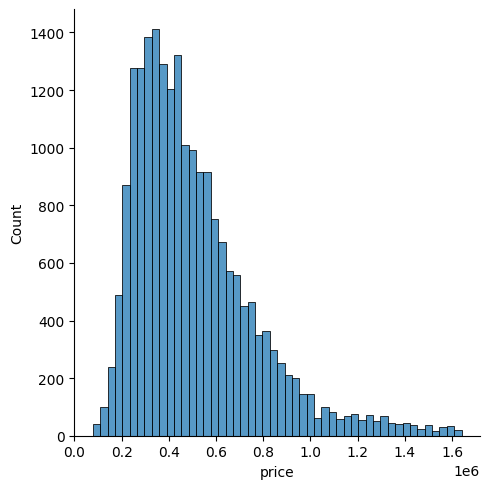

In [3771]:
sns.displot(df, x="price", bins=50)

Because regression models prefer normally distributed data, and the price data is currently skewed, I want to normalize it and compress the scale to make the data better for the models. To do this, I'll take the logarithm of the price data and put that into a new column called price_transformed. 

In [3772]:
df['price_transformed'] = df['price'].copy()


In [3773]:
df['price_transformed'] = np.log(df['price_transformed'])


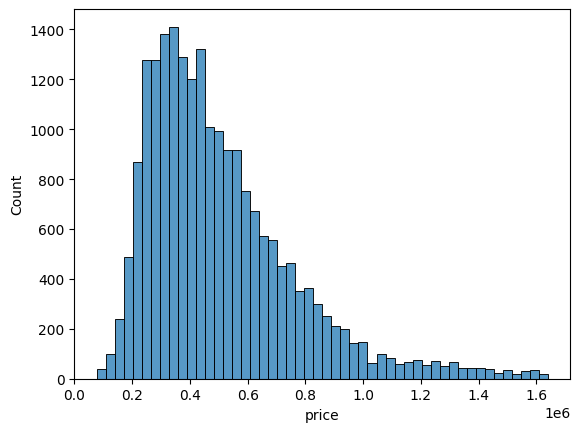

<Axes: xlabel='price_transformed', ylabel='Count'>

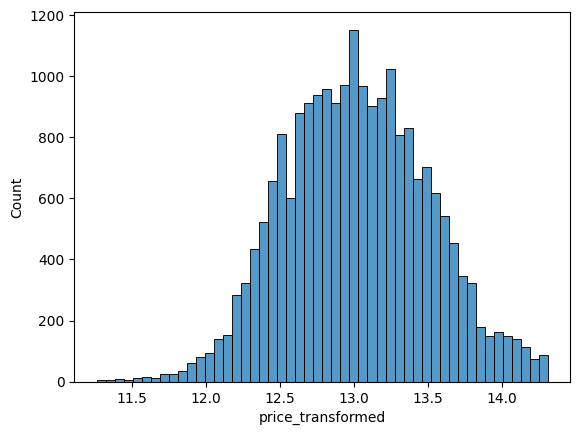

In [3774]:
sns.histplot(df['price'], bins=50)
plt.show()
sns.histplot(df['price_transformed'], bins=50)



As we can now see, the price_transformed is a normally distributed representation of the price data, and could help improve model performance. 

I want to review each variable and how it affects the price variable. To do this, I'm going to iterate through all the table variables and plot those relationships to review which variables have the most impact on price.

In [3797]:
df.head()

,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_avg_price_per_sqft,price_transformed
0,2014-10-13,10,2014,13,221900.0,3,1.00,1180,5650,1.0,...,0,1955,1955,98178,47.5112,-122.257,1340,5650,177.107228,12.309982
117,2014-06-23,6,2014,23,205425.0,2,1.00,880,6780,1.0,...,0,1945,1945,98178,47.5009,-122.248,1190,6780,177.107228,12.232836
126,2014-07-17,7,2014,17,445000.0,3,2.25,2100,8201,1.0,...,480,1967,1967,98178,47.5091,-122.244,2660,8712,177.107228,13.005830
273,2014-09-25,9,2014,25,236000.0,3,1.00,1300,5898,1.0,...,0,1961,1961,98178,47.5053,-122.255,1320,7619,177.107228,12.371587
281,2015-02-27,2,2015,27,170000.0,2,1.00,860,5265,1.0,...,0,1931,1931,98178,47.5048,-122.272,1650,8775,177.107228,12.043554


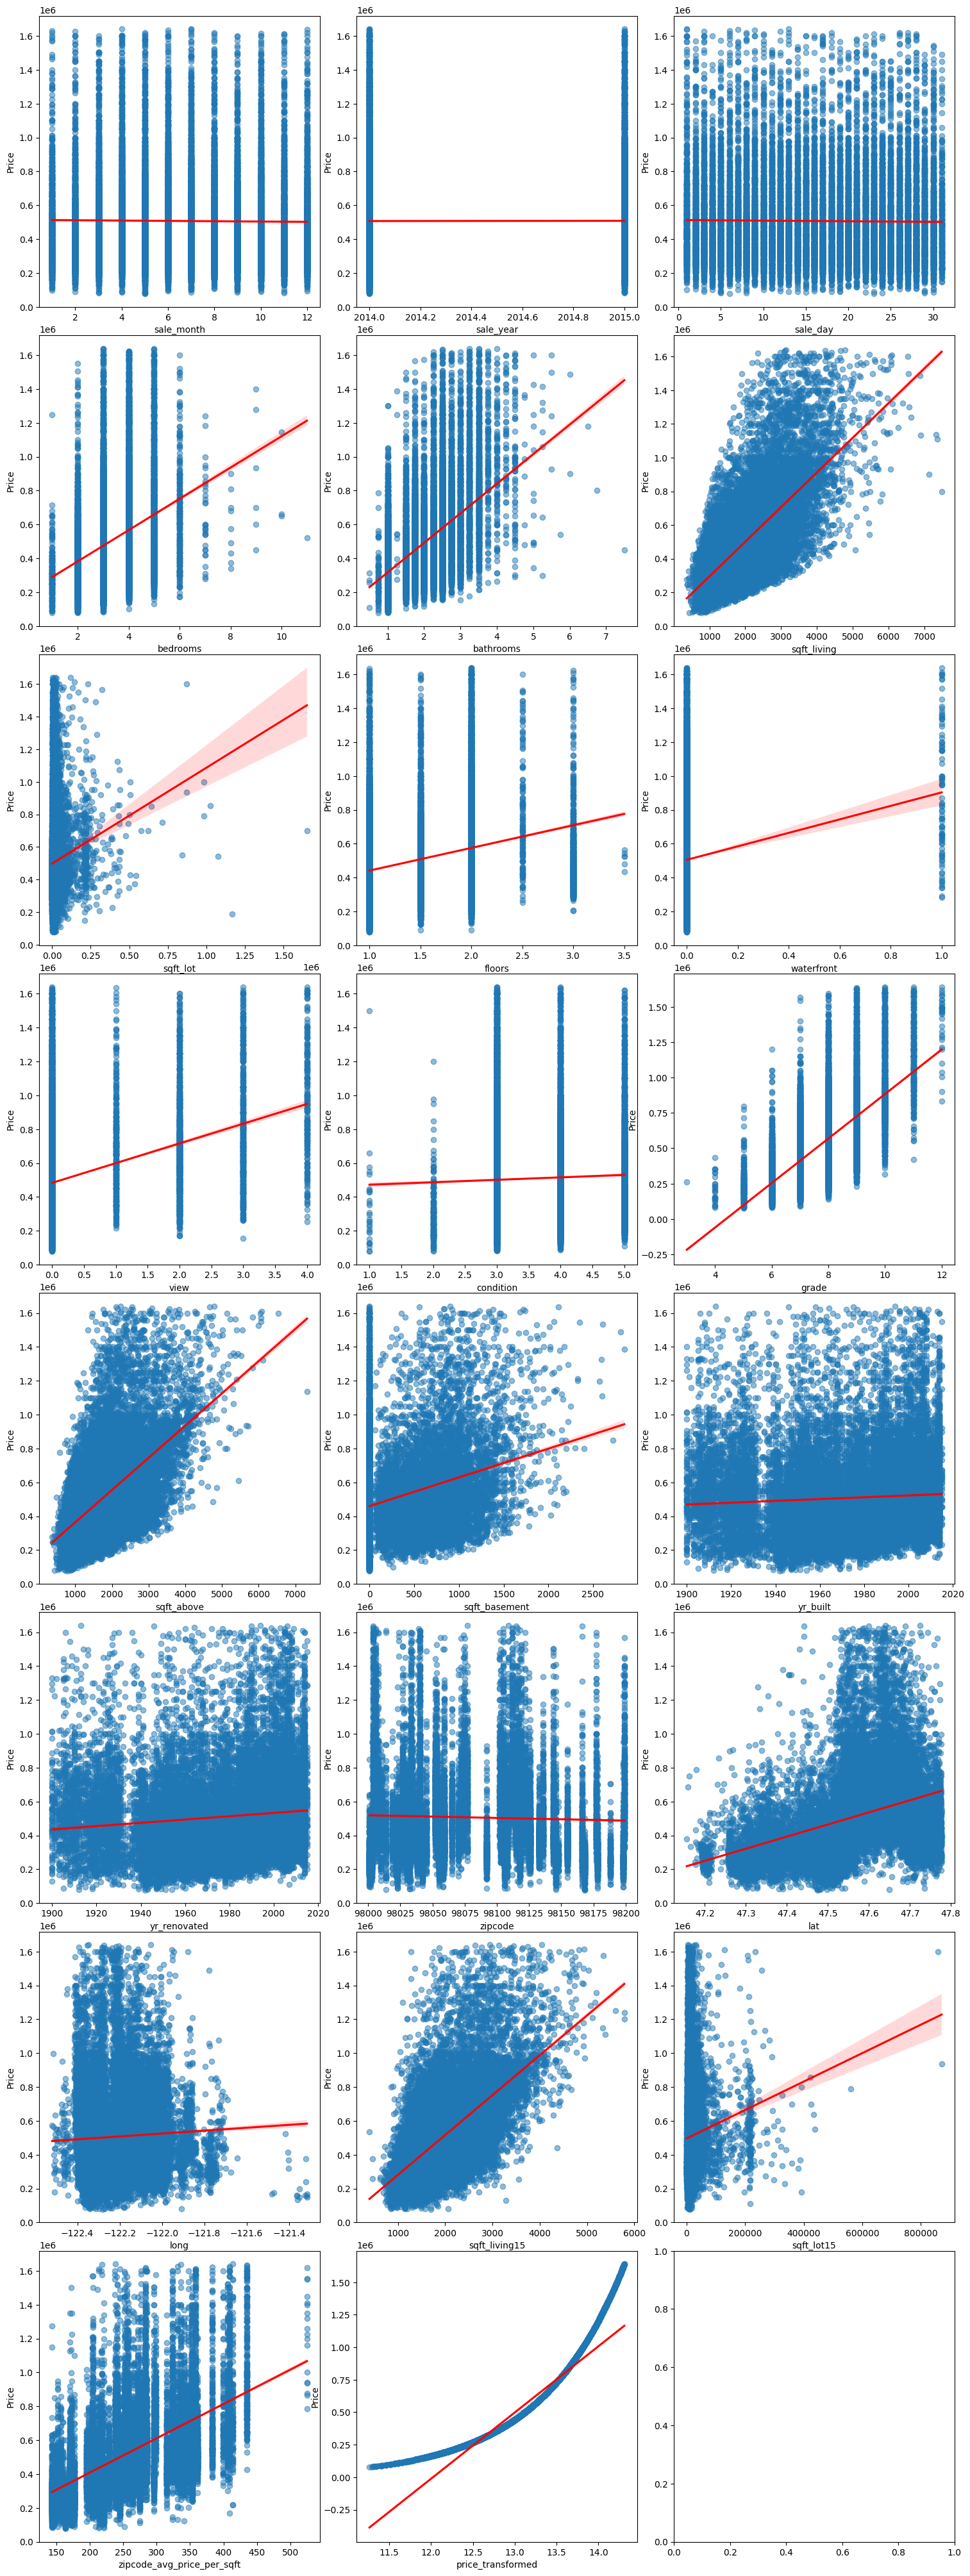

In [3775]:
columns = df.columns.drop(['price', 'date'])

# Set the number of rows and columns for the subplots grid
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

# Iterate over the columns and create scatter plots with a line of best fit
for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  # Select the appropriate subplot
    sns.regplot(x=column, y='price', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')


plt.show()




According to these graphs, there are a few variables that seem to have a stronger correlation to price than others; namely sqft_living, sqft_living15, sqft_above, and grade. However, I wan't to see specifically which variables have the strongest impact on price, so I'll iterate through all the variables and check their respective correlation coeffecient, and sort those from highest to lowest.

In [3776]:
columns = df.columns.drop(['price','date'])

correlations = []
for column in columns:
    corr_coeff = df[column].corr(df['price'])
    correlations.append((column, corr_coeff))

# Sort the correlations by the coefficient in descending order
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# Print the sorted correlations
for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")



Correlation between price_transformed and price: 0.95
Correlation between grade and price: 0.67
Correlation between sqft_living and price: 0.66
Correlation between sqft_living15 and price: 0.60
Correlation between zipcode_avg_price_per_sqft and price: 0.58
Correlation between sqft_above and price: 0.57
Correlation between bathrooms and price: 0.50
Correlation between lat and price: 0.38
Correlation between bedrooms and price: 0.32
Correlation between view and price: 0.32
Correlation between sqft_basement and price: 0.28
Correlation between floors and price: 0.28
Correlation between yr_renovated and price: 0.11
Correlation between waterfront and price: 0.10
Correlation between sqft_lot and price: 0.09
Correlation between sqft_lot15 and price: 0.09
Correlation between yr_built and price: 0.06
Correlation between long and price: 0.05
Correlation between condition and price: 0.04
Correlation between zipcode and price: -0.03
Correlation between sale_month and price: -0.01
Correlation betwee

Based on these correlation coeffecients, we can see that price is most impacted by grade, sqft_living, sqft_living15, sqft_above, bathrooms, lat, bedrooms, view, sqft_basement, and floors. I will look to include all variables with a correlation of +/- 0.1 and more. 

In [3777]:
results = ols("price ~  grade + sqft_living + sqft_living15 + zipcode_avg_price_per_sqft + sqft_above + bathrooms + lat + bedrooms + view + sqft_basement + floors + yr_renovated + waterfront", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     8094.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:10:41   Log-Likelihood:            -2.7598e+05
No. Observations:               21190   AIC:                         5.520e+05
Df Residuals:                   21177   BIC:                         5.521e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [3796]:
results = ols("price_transformed ~  grade + sqft_living + sqft_living15 + zipcode_avg_price_per_sqft + sqft_above + bathrooms + lat + bedrooms + view + sqft_basement + floors + yr_renovated + waterfront", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      price_transformed   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     9279.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:11:22   Log-Likelihood:                 4743.3
No. Observations:               21190   AIC:                            -9461.
Df Residuals:                   21177   BIC:                            -9357.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [3778]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

In [3779]:
categorical_features = ['waterfront', 'view', 'condition', 'grade' ] #first determine categorical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','zipcode_avg_price_per_sqft', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

In [3780]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1101)

In [3781]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [3782]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)
])

In [3783]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))


[481712. 495680. 476704. ... 947088. 252896. 186416.]


44034549575712.67

In [3784]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0)) #default value will be 1
])

ridge_regression.fit(X_train, y_train)

ridge_pred = ridge_regression.predict(X_test)
print(ridge_pred)

np.sqrt(mean_squared_error(ridge_pred,y_test))

[481374.20405791 494617.95589663 477127.73100079 ... 946245.35450118
 253983.5572267  186194.27941675]


104652.47756242889

In [3785]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=2.0)) #alpha sets how sensitive the model is at removing variables. Higher the more it removes.
])

lasso_regression.fit(X_train, y_train)

lasso_pred = lasso_regression.predict(X_test)
print(lasso_pred)

np.sqrt(mean_squared_error(lasso_pred,y_test))

[481497.46135233 494661.70433771 477078.59065696 ... 946290.27919234
 254102.45783812 186097.2413274 ]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+12, tolerance: 9.930e+10
  model = cd_fast.enet_coordinate_descent(


104670.94701722672

In [3786]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=3.0, l1_ratio=0.5)) #L1 eliminates features, L2 simply minimizes them. Default here is 0.5 if not set.
])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)
print(elasticnet_pred)

np.sqrt(mean_squared_error(elasticnet_pred, y_test))

[434426.85076415 486855.31020371 466043.94339457 ... 760100.10176904
 361213.84810061 341629.07670612]


155015.51694070952

In [3787]:
categorical_features = ['waterfront', 'view', 'condition', 'grade' ] #first determine categorical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','zipcode_avg_price_per_sqft', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price_transformed'

In [3788]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1101)

In [3789]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [3790]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)
])

In [3791]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to your training data
linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))

[13.00634766 13.02392578 12.95288086 ... 13.76867676 12.49707031
 12.36621094]


240435544.80909258

In [3792]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0)) #default value will be 1
])

ridge_regression.fit(X_train, y_train)

ridge_pred = ridge_regression.predict(X_test)
print(ridge_pred)

np.sqrt(mean_squared_error(ridge_pred,y_test))

[13.003869   13.02464517 12.95331862 ... 13.76884438 12.49772599
 12.3637609 ]


0.181632592482075

In [3793]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0)) #alpha sets how sensitive the model is at removing variables. Higher the more it removes.
])

lasso_regression.fit(X_train, y_train)

lasso_pred = lasso_regression.predict(X_test)
print(lasso_pred)

np.sqrt(mean_squared_error(lasso_pred,y_test))

[13.01596617 13.01596617 13.01596617 ... 13.01596617 13.01596617
 13.01596617]


0.48369215299768886

In [3794]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.1)) #L1 eliminates features, L2 simply minimizes them. Default here is 0.5 if not set.
])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)
print(elasticnet_pred)

np.sqrt(mean_squared_error(elasticnet_pred, y_test))

[12.96868965 13.01071055 12.90175469 ... 13.37240251 12.78278606
 12.78083641]


0.31935075529110585

In [3802]:
np.exp(13.003869)

444128.40497582924

In [3804]:
np.exp(13.003869+0.181632592482075) - np.exp(13.003869)

88458.62111016113

Based on the price_transformed models, the best performer is also ridge_regression. However, the +/- 0.181632592482075 corresponds to very different price variations depending on if the price is low or high of the house. If the price of the house is the min price, this corresponds to a +/- RMSE of $15,535. Extremely accurate! However, for higher priced home estimates, the RMSE variation goes as high as +/- $326,644, much worse than modeling with the normal price variable.

In [3806]:
np.exp(df['price_transformed'].min() + 0.181632592482075) - np.exp(df['price_transformed'].min())

15535.53514994854

In [3807]:
np.exp(df['price_transformed'].max() + 0.181632592482075) - np.exp(df['price_transformed'].max())

326644.585204046